In [2]:
#for matplotlib plots to appear in the notebook (magic command special to jupyter)
%matplotlib inline
from matplotlib import style      #import libraries for visualization
style.use('fivethirtyeight')      #apply a specific style for plots - makes them look like "FiveThirtyEight" website
import matplotlib.pyplot as plt   #import matplotlib's pyplot module - lets you use plt to create plots


In [3]:
#import numerical and data handling libraries that help you visualize and analyze data once you get it
import numpy as np      #numerical computing with arrays
import pandas as pd     #data manipulation and analysis with tables
import datetime as dt   #for working with date and time data


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy                                  #python tool used for connecting databases and pulling data from them
from sqlalchemy.ext.automap import automap_base    #import automap_base to reflect database tables into Python classes
from sqlalchemy.orm import Session                 #import session to handle database transactions
from sqlalchemy import create_engine, func         #import create_engine to connect to a sqlite database


In [5]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")   #SQLite is a type of database stored in a file


In [6]:
# Declare a Base using `automap_base()`
Base = automap_base()    #prepares sqlalchemy to look at database and detect its tables

# Use the Base class to reflect the database tables
Base.prepare(autoload_with = engine)   #detects the tables in database and turns them into python classes


In [7]:
# Print all of the classes mapped to the Base
Base.classes.keys()


['measurement', 'station']

In [8]:
# Assign the measurement class to a variable called `Measurement` and the station class to a variable called `Station`
Measurement = Base.classes.measurement  #measurement table  
Station = Base.classes.station          #station table


In [9]:
# Create a session
session = Session(engine) 


# Exploratory Precipitation Analysis

In [ ]:
# Find the most recent date in the data set.

#utilize sqlalchemy's func module to perform an aggregate function, max
recent_date = session.query(func.max(Measurement.date)).first()
recent_date

('2017-08-23',)

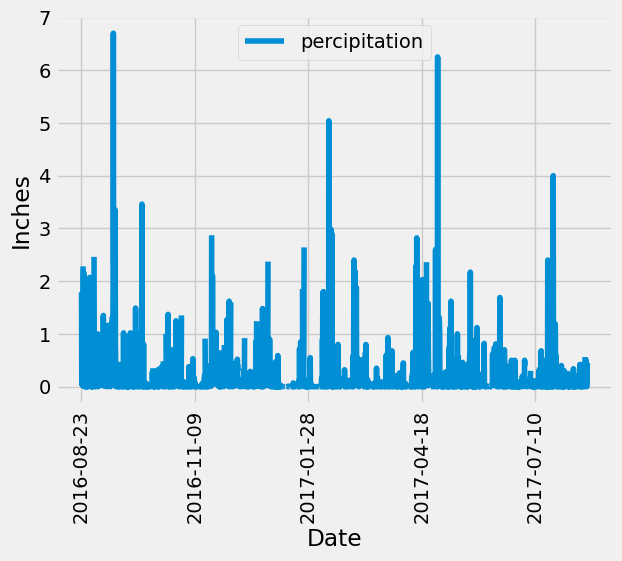

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.

# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
percipitation_scores = session.query(Measurement.date, Measurement.prcp)\
                              .filter(Measurement.date >= year_ago).all()
                              # filter only records from 2016-08-23 onward

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Converts the list of tuples into a Panda DataFrame
df = pd.DataFrame(percipitation_scores, columns=['date', 'percipitation'])

# Sort the dataframe by date
df = df.sort_values('date')

# Use Pandas Plotting with Matplotlib to plot the data
df.plot(x='date', y='percipitation', rot=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [ ]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe()

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [ ]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [39]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, 
              func.count(Measurement.station))\
                .group_by(Measurement.station)\
                .order_by(func.count(Measurement.station).desc())\
                .all()
# group by the station numbers
# order by the count of stations in descending order


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [42]:
# Using the most active station id (USC00519281) from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs), 
              func.max(Measurement.tobs), 
              func.avg(Measurement.tobs))\
                .filter(Measurement.station == 'USC00519281')\
                .all()

[(54.0, 85.0, 71.66378066378067)]

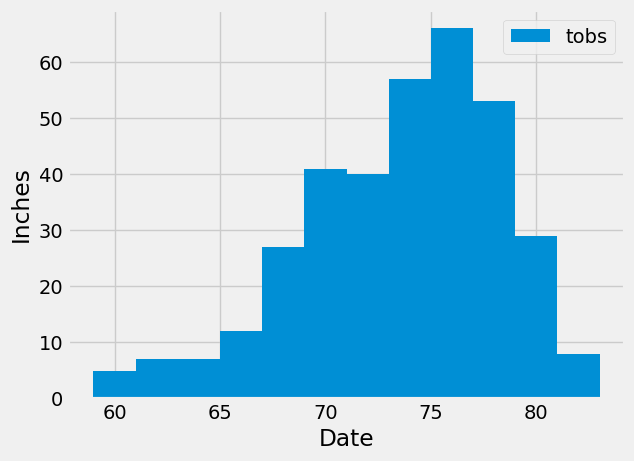

In [43]:
# Using the most active station id
# Query the last 12 months (using year_ago) of temperature observation data for this station and plot the results as a histogram

# Perform a query to retrieve the data and precipitation scores
query_results = session.query(Measurement.tobs)\
                              .filter(Measurement.station == 'USC00519281')\
                              .filter(Measurement.date >= year_ago).all()
                              # filter only records from 2016-08-23 onward

# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Converts the list of tuples into a Panda DataFrame
df = pd.DataFrame(query_results, columns=['tobs'])

# Use Pandas Plotting with Matplotlib to plot the data
df.plot.hist(bins=12)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()

# Close Session

In [44]:
# Close Session
session.close()
